<a href="https://colab.research.google.com/github/rafafadilaras/Machine-Learning_2025/blob/main/20_Rafa_Fadil_Aras_JS11(Klasifikasi_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 11 - Klasifikasi 2**

## **Praktikum 1 - Klasifikasi SVM dengan Data Dummy Linier**

### **Langkah 1 - Import library**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### **Langkah 2 - Membuat Data Dummy**

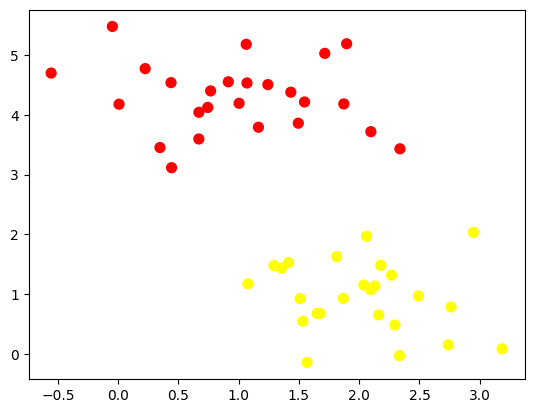

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

### **Langkah 3 - Buat Ilustrasi Garis Pemisah**

### **Langkah 4 - Ilustrasi Margin**

(-1.0, 3.5)

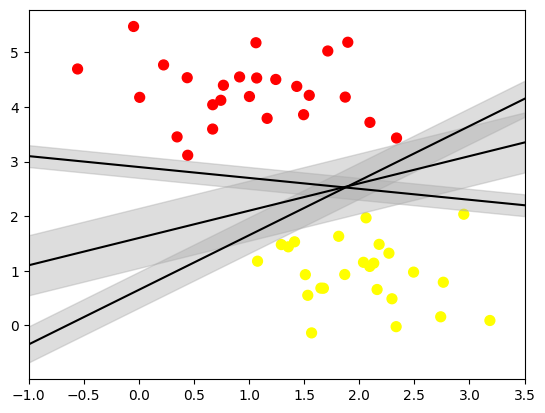

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

### **Langkah 5 - Fitting Model**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

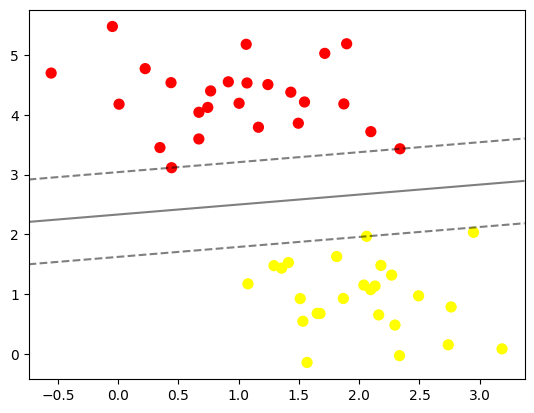

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

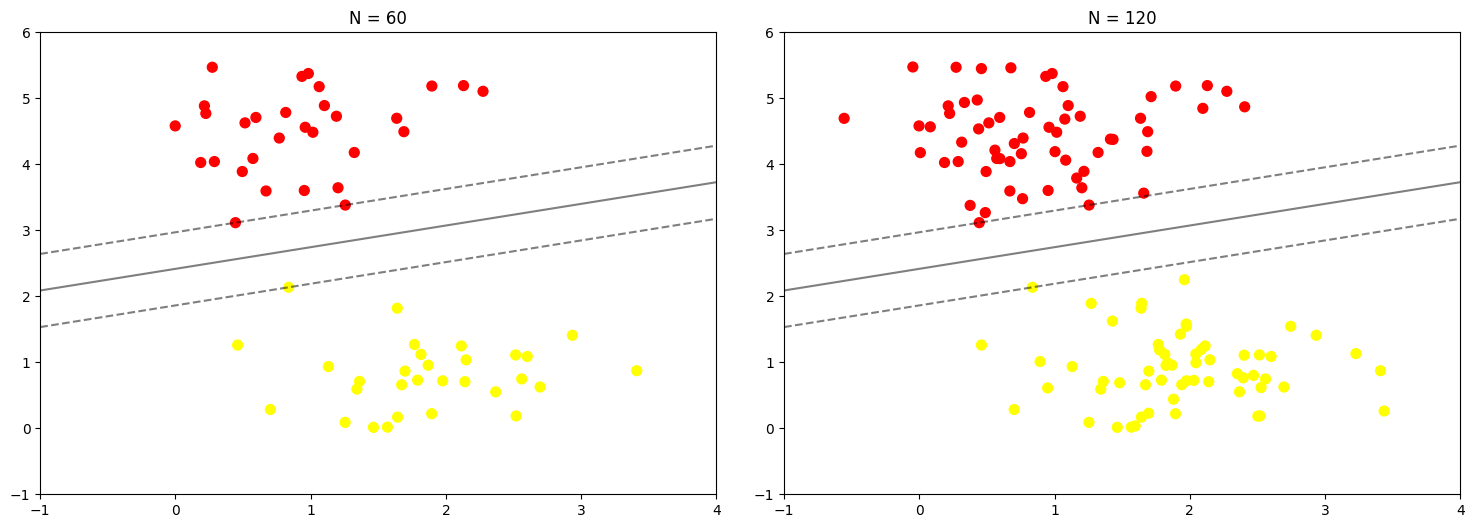

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
!pip install ipywidgets

# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00


interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

## **Praktikum 2 - Klasifikasi SVM dengan Data Dummy Non-Linier**

### **Langkah 1 - Ilustrasi Data Non-Linier**

### **Langkah 1a - Import Library**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### **Langkah 1b - Buat Kembali Fungsi Plotting**

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### **Langkah 1c - Buat Data Dummy Non-Linier**

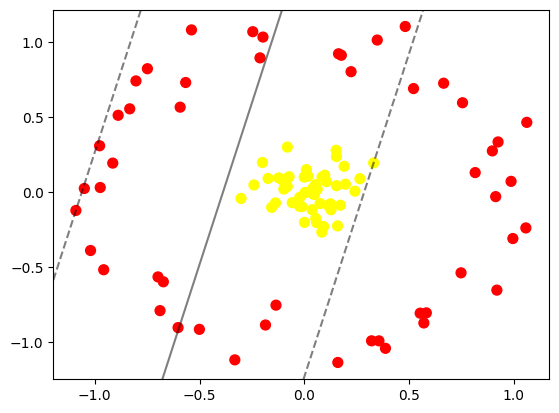

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
!pip install ipywidgets

In [ ]:
!pip install matplotlib

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-5.00941340e-01, -9.13499591e-01],
       [ 5.70643766e-01, -8.71086664e-01],
       [ 7.55203006e-01,  5.95544581e-01],
       [-1.72842274e-01,  9.14492913e-02],
       [ 1.05505889e-01,  7.05576251e-02],
       [ 8.15634483e-01,  1.30363148e-01],
       [-9.57645862e-01, -5.16658834e-01],
       [ 9.97465774e-03,  1.50089908e-01],
       [ 7.49295071e-02, -7.57773715e-02],
       [ 1.71729488e-02,  1.06730819e-01],
       [ 6.15459322e-02,  1.99638649e-02],
       [ 1.53615397e-01,  4.31478418e-02],
       [ 1.76606886e-01,  9.11843125e-01],
       [-9.77140698e-01,  3.09097766e-01],
       [-5.92683303e-01,  5.65997281e-01],
       [-1.01709768e-01,  7.65317462e-02],
       [ 9.13522304e-01, -2.96409891e-02],
       [ 1.58830299e-01, -2.24469342e-01],
       [ 5.82381389e-01, -8.03754659e-01],
       [ 3.30932865e-01,  1.95038185e-01],
       [ 9.78573958e-02,  1.12741686e-01],
       [ 8.97610690e-01,  2.74872472e-01],
       [-1.02045018e+00, -3.88487919e-01],
       [-5.66285873e-01,  7.30274743e-01],
       [ 1.96228639e-01,  5.31190352e-02],
       [ 1.52100905e-01,  2.78907505e-01],
       [ 9.22123424e-02, -2.29249173e-01],
       [ 5.53077839e-01, -8.05947653e-01],
       [ 4.81778020e-01,  1.10344115e+00],
       [-2.16379693e-02, -3.39522522e-02],
       [ 1.14195751e-01, -8.74460337e-02],
       [ 4.81536921e-03, -1.97790653e-03],
       [-2.11559562e-01,  8.94366951e-01],
       [-2.23283508e-02, -9.41006687e-02],
       [ 5.21309960e-01,  6.89952862e-01],
       [ 5.47327953e-02, -1.75188709e-01],
       [ 5.34925283e-02,  4.92655857e-02],
       [ 9.24882256e-01,  3.34468607e-01],
       [-4.14646424e-04,  1.00323142e-01],
       [ 8.46072195e-02,  1.00527059e-01],
       [ 3.56156660e-01, -9.90221006e-01],
       [ 6.65041567e-01,  7.25504703e-01],
       [ 3.21020607e-01, -9.89967630e-01],
       [-8.33433066e-01,  5.55009983e-01],
       [-1.85402115e-01, -8.84516874e-01],
       [ 1.05756426e+00, -2.38167610e-01],
       [-8.10024512e-02,  3.00330342e-01],
       [-6.72944686e-01, -5.96735219e-01],
       [ 1.27563785e-01, -1.17062188e-01],
       [ 1.59971080e-01, -1.13419129e+00],
       [ 3.87333761e-01, -1.03997437e+00],
       [-9.14427484e-01,  1.93569574e-01],
       [-3.31628356e-01, -1.11672476e+00],
       [-2.46003270e-01,  1.06865350e+00],
       [-1.99751660e-01,  1.97627332e-01],
       [-1.21602212e-01,  9.47511490e-02],
       [-6.02628053e-01, -9.01952113e-01],
       [-1.09038454e+00, -1.21751715e-01],
       [ 2.23122974e-01,  8.02328066e-01],
       [-9.76646331e-02,  2.09038785e-02],
       [-5.38624568e-01,  1.08059789e+00],
       [-1.05018321e+00,  2.45691828e-02],
       [ 1.63365436e-01,  9.21575969e-01],
       [ 5.83507121e-02, -2.02598068e-01],
       [ 4.78527391e-02, -1.43916782e-02],
       [ 3.43848062e-03, -3.85332430e-03],
       [ 1.06206217e+00,  4.64895870e-01],
       [-3.02100788e-01, -4.18547091e-02],
       [-1.16594337e-02, -9.61833100e-02],
       [ 8.36100565e-02, -2.66050467e-01],
       [ 7.48133913e-01, -5.37192598e-01],
       [ 7.84423009e-04, -2.01106313e-01],
       [ 3.48138002e-01,  1.01316631e+00],
       [-6.88756837e-01, -7.88879510e-01],
       [ 3.70734543e-02, -1.16941854e-01],
       [ 9.86993248e-01,  7.19998590e-02],
       [-2.40568100e-01,  4.79220983e-02],
       [-5.78452888e-02, -7.00056215e-02],
       [-9.74194300e-01,  3.10467616e-02],
       [ 1.24497273e-01, -7.76168210e-02],
       [ 9.19176708e-01, -6.52327931e-01],
       [ 9.95476565e-01, -3.08755319e-01],
       [-7.48968009e-01,  8.22168771e-01],
       [ 2.65427572e-01,  8.98853784e-02],
       [-1.55890090e-01, -1.00990663e-01],
       [ 1.53331120e-01,  2.37572112e-01],
       [ 2.41750241e-01,  6.66887145e-03],
       [-8.03634202e-01,  7.40981100e-01],
       [ 4.21612174e-02, -1.22688922e-02],
       [ 4.03855679e-02,  2.53945660e-02],
       [ 1.89975863e-01,  1.72150577e-01],
       [-1.37513490e-01, -7.15874799e-02

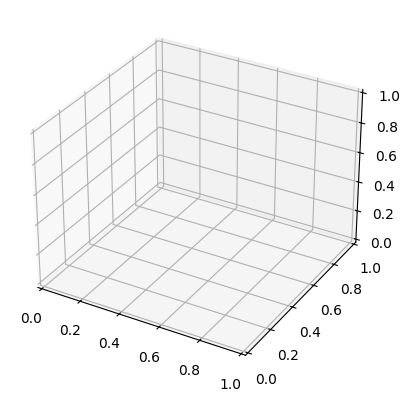

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

### **Langkah 2 - Fitting Model**

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

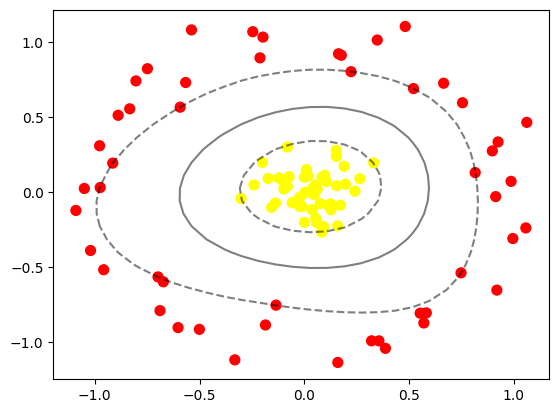

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## **Praktikum 3 - SVM Data Overlapping**

### **Langkah 1 - Import Library dan Buat Fungsi Plotting**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### **Langkah 2 - Buat Data Dummy**

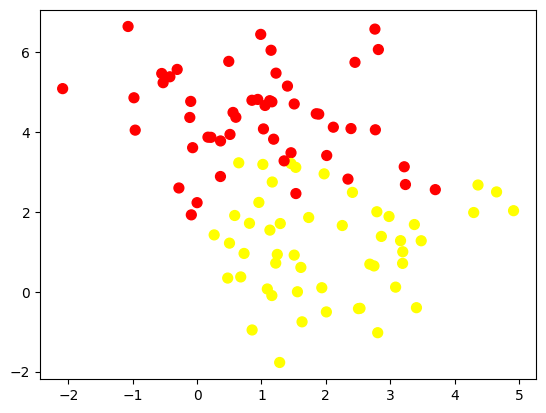

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

### **Langkah 3 - Analisis Dampak Tunning**

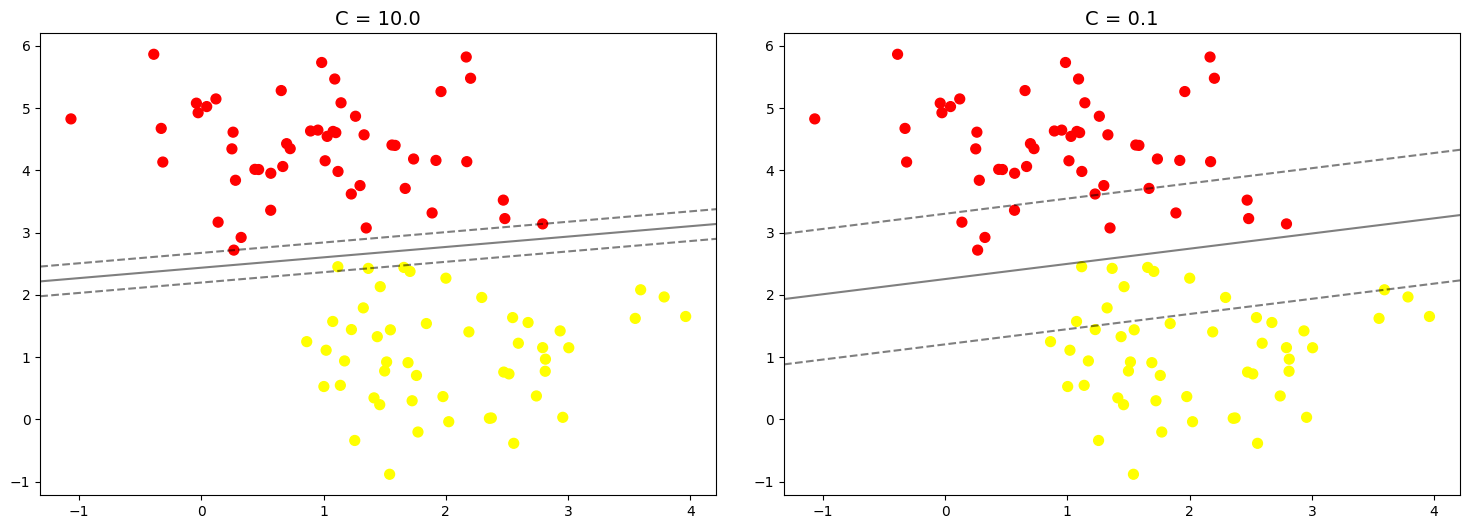

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## **Praktikum 4 - Klasifikasi Citra Wajah**

### **Langkah 0 - Unduh Dataset**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


### **Langkah 1 - Inspeksi Citra Wajah**

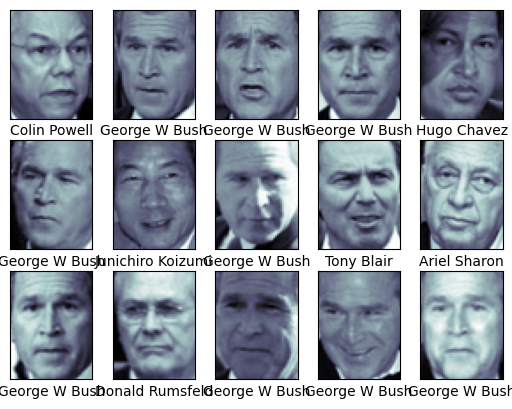

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### **Langkah 2 - Pra Pengolahan Data**

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

### **Langkah 3 - Split Data**

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

### **Langkah 4 - Pembuatan Model + Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 11s, sys: 237 ms, total: 2min 11s
Wall time: 1min 23s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

### **Langkah 5 - Cek Hasil Prediksi**

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

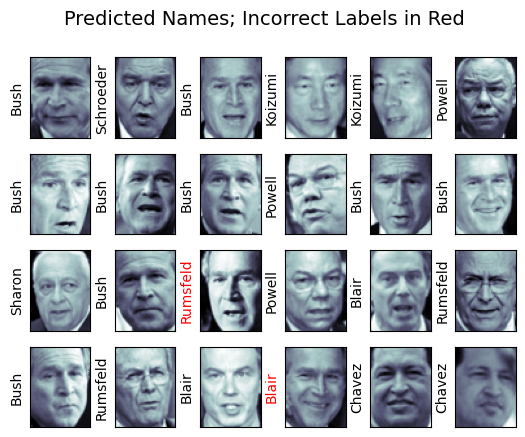

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

### **Langkah 6 - Cek Performansi**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

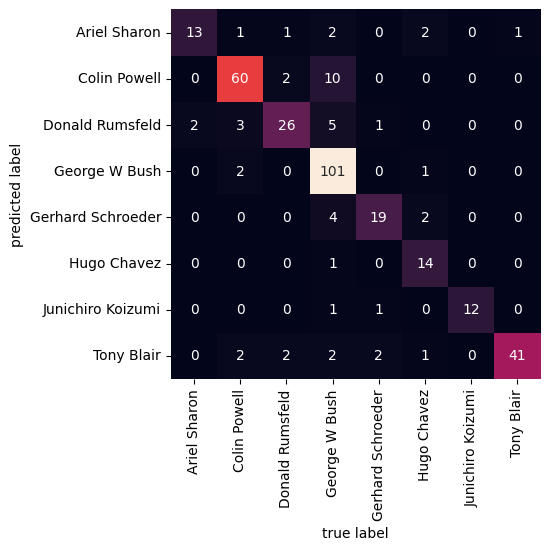

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## **Praktikum 5 - Klasifikasi Citra Siang dan Malam**

### **Langkah 0 - Import Library**

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/Machine Learning/JS11/images/images/training"
test_dir = "/content/drive/MyDrive/Machine Learning/JS11/images/images/test"

### **Langkah 1 - Load Data dan Visualisasikan**

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if not img is None:
                img_list.append((img, label))
    return img_list

In [ ]:
train_img = load_dataset(train_dir)

In [ ]:
train_img[0]

(array([[[97, 54, 71],
         [59, 16, 33],
         [94, 51, 70],
         ...,
         [71, 51, 76],
         [62, 43, 71],
         [43, 27, 54]],
 
        [[85, 42, 59],
         [42,  0, 16],
         [83, 40, 57],
         ...,
         [32,  9, 38],
         [24,  5, 35],
         [43, 27, 56]],
 
        [[38,  0, 11],
         [94, 53, 67],
         [73, 32, 46],
         ...,
         [41, 15, 52],
         [50, 28, 66],
         [46, 26, 63]],
 
        ...,
 
        [[34,  3, 21],
         [31,  0, 15],
         [38,  6, 17],
         ...,
         [37,  9,  5],
         [43, 15, 11],
         [37,  9,  5]],
 
        [[56, 27, 32],
         [37,  8, 10],
         [44, 14, 12],
         ...,
         [37,  8,  0],
         [54, 25, 17],
         [26,  0,  0]],
 
        [[62, 38, 28],
         [47, 23, 11],
         [67, 41, 26],
         ...,
         [56, 27, 13],
         [76, 47, 33],
         [39, 11,  0]]], dtype=uint8),
 'night')

In [ ]:
pick_random = np.random.randint(0, len(train_img))
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 17
(700, 1280, 3)


In [ ]:
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))
    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'
    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (737, 1024, 3)
Label	: day


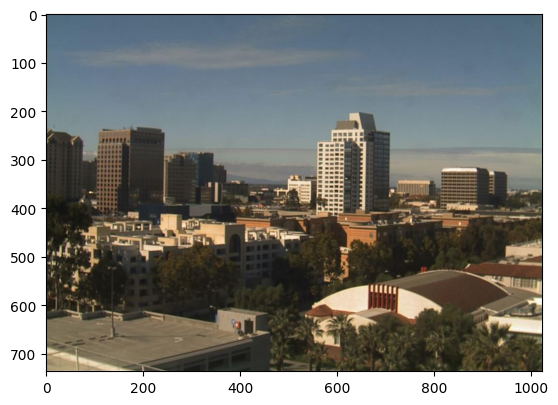

In [ ]:
random_img_viz(train_img)

### **Langkah 3 - Pra Pengolahan Data**

In [ ]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))
    return std_img

In [ ]:
def label_encoder(label):
    num_val = 0
    if(label == 'day'):
        num_val = 1
    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []
    for item in img_list:
        image = item[0]
        label = item[1]
        std_img = standarized_input(image)
        img_label = label_encoder(label)
        std_img_list.append((std_img, img_label))
    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
pick_random = np.random.randint(0, len(train_std_img_list))
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 55
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


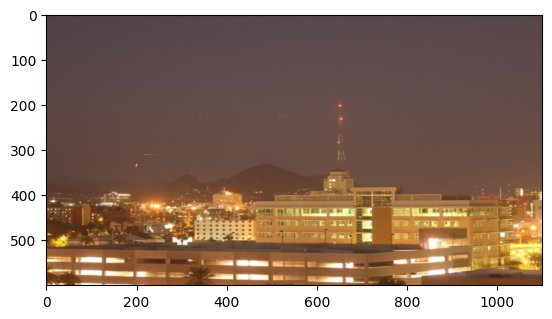

In [ ]:
random_img_viz(train_std_img_list)

### **Langkah 4 - Ekstraksi Fitur**

In [ ]:
def avg_brightness(image):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(img_hsv[:,:,2])
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area
    return avg

Image 215
Avg Brighness: 131.7712


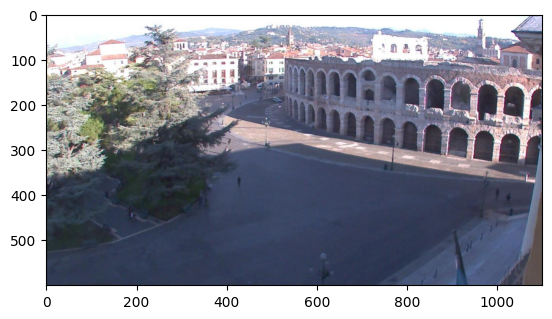

In [ ]:
rand_img = np.random.randint(0, len(train_std_img_list))
feature_img = train_std_img_list[rand_img][0]
avg_img = avg_brightness(feature_img)
print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

### **Langkah 5 - Klasifikasi dengan Metode Threshold**

In [ ]:
def predict_label(img, threshold):
    avg = avg_brightness(img)
    pred = 0
    if avg > threshold:
        pred = 1
    return pred

Image 164
Actual label: 1
Predicted label: 0


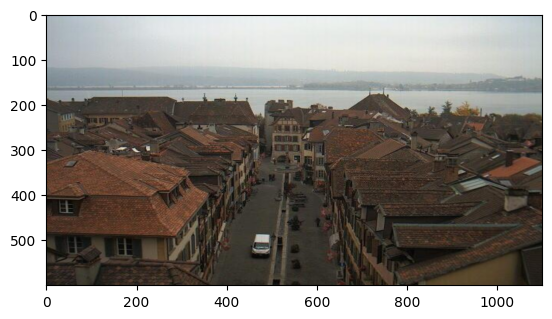

In [ ]:
rand_img = np.random.randint(0, len(train_std_img_list))
pred = predict_label(train_std_img_list[rand_img][0], threshold=120)
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

### **Langkah 6 - Evaluasi Manual**

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []
    for file in img_list:
        img = file[0]
        label = file[1]
        pred_label = predict_label(img, threshold)
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img
    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


### **Klasifikasi dengan SVM**
### **Langkah 4 Alternatif - Membuat Feature Vectors.**

In [ ]:
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []
    for img in img_list:
        img_avg = avg_brightness(img[0])
        img_label = img[1]
        avg_list.append(img_avg)
        labels.append(img_label)
    data = np.column_stack((avg_list, labels))
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])
    return df

In [ ]:
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,101.579750,0.0
1,98.714723,0.0
2,24.730023,0.0
3,99.077967,0.0
4,39.326377,0.0


In [ ]:
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,132.243377,1.0
1,129.938794,1.0
2,188.119652,1.0
3,127.443791,1.0
4,98.868853,1.0


### **Langkah 5 - Buat Model SVM**

In [ ]:
from sklearn.svm import SVC
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]
model = SVC()
model.fit(X_train, y_train)

SVC()

### **Langkah 6 - Evaluasi**

In [ ]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


## **Tugas**

## **1. Membuat model SVM dengan dataset voice.cvs**

### **Langkah 1 - Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### **Langkah 2 - Load dataset**

In [ ]:
# Load data
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### **Langkah 3 - Memisahkan Fitur dan Label + Label Encoding**

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

le = LabelEncoder()
y = le.fit_transform(y)  # male=1, female=0

### **Langkah 4 - Standarisasi Fitur**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### **Langkah 5 - Fungsi Evaluasi Model SVM**

In [ ]:
def evaluate_svm(test_size, kernel):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

### **Langkah 6 - Evaluasi Model Berdasarkan Split dan Kernel**

In [ ]:
results = []
splits = [(0.30, "70:30"), (0.20, "80:20")]
kernels = ["linear", "poly", "rbf"]

for test_size, split_label in splits:
    for k in kernels:
        acc = evaluate_svm(test_size, k)
        results.append([split_label, k, round(acc, 4)])

results_df = pd.DataFrame(results, columns=["Split", "Kernel", "Accuracy"])
results_df

,Split,Kernel,Accuracy
0,70:30,linear,0.9790
1,70:30,poly,0.9590
2,70:30,rbf,0.9832
3,80:20,linear,0.9748
4,80:20,poly,0.9574
5,80:20,rbf,0.9826


### **Langkah 7 - Visualisasi Perbandingan Akurasi**

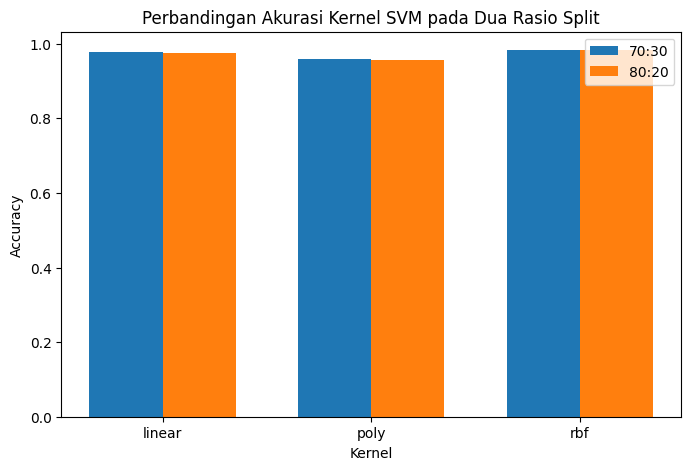

In [ ]:
plt.figure(figsize=(8,5))

kernels = ["linear", "poly", "rbf"]
acc_70 = results_df[results_df["Split"]=="70:30"]["Accuracy"].values
acc_80 = results_df[results_df["Split"]=="80:20"]["Accuracy"].values

x = np.arange(len(kernels))
width = 0.35

plt.bar(x - width/2, acc_70, width, label="70:30")
plt.bar(x + width/2, acc_80, width, label="80:20")

plt.xticks(x, kernels)
plt.ylabel("Accuracy")
plt.xlabel("Kernel")
plt.title("Perbandingan Akurasi Kernel SVM pada Dua Rasio Split")
plt.legend()
plt.show()

Berdasarkan hasil pengujian pada dataset voice.csv, model SVM mampu mengklasifikasikan suara dengan tingkat akurasi yang tinggi pada berbagai jenis kernel dan rasio pembagian data. Secara umum, baik pada pembagian 70:30 maupun 80:20, kernel RBF menunjukkan performa paling stabil dan menghasilkan akurasi tertinggi dibandingkan kernel linear maupun polynomial. Hal ini menandakan bahwa hubungan antara fitur-fitur suara tidak sepenuhnya linear, sehingga kernel RBF yang bersifat non-linear lebih mampu menangkap pola kompleks pada data suara. Dengan demikian, model SVM dengan kernel RBF menjadi pilihan terbaik untuk membedakan suara laki-laki dan perempuan pada dataset ini.

## **2. Membuat model klasifikasi siang dan malam**

### **Langkah 1 - Import Library**

In [ ]:
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Langkah 2 - Menentukan Path Dataset**

In [ ]:
root = Path("/content/drive/MyDrive/Machine Learning/JS11/images/images")

### **Langkah 3 - Fungsi Load Gambar & Ekstraksi Fitur Histogram (Channel V HSV)**

In [ ]:
def load_images_and_labels(root):
    data = []
    for folder in ["training/day", "training/night", "tes/day", "tes/night"]:
        label = 1 if "day" in folder else 0
        for img_path in (root / folder).glob("*.jpg"):
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (100, 100))
            hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            hist = cv2.calcHist([hsv], [2], None, [256], [0,256]).flatten()
            data.append((hist, label))
    return data

dataset = load_images_and_labels(root)
len(dataset)

240

### **Langkah 4 - Memisahkan Fitur dan Label serta Melakukan Train-Test Split (80:20)**

In [ ]:
X = np.array([d[0] for d in dataset])
y = np.array([d[1] for d in dataset])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((192, 256), (48, 256))

### **Langkah 5 - Hyperparameter Tuning SVM RBF**

In [ ]:
results = []

C_values = [1, 10, 100]
gamma_values = [0.1, 0.01, 0.001]

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append([C, gamma, round(acc, 4)])

results_df = pd.DataFrame(results, columns=["C", "gamma", "Accuracy"])
results_df

,C,gamma,Accuracy
0,1,0.100,0.5000
1,1,0.010,0.8750
2,1,0.001,0.5625
3,10,0.100,0.5000
4,10,0.010,0.8750
5,10,0.001,0.5625
6,100,0.100,0.5000
7,100,0.010,0.8750
8,100,0.001,0.5625


### **Langkah 6 - Visualisasi Hasil dalam Heatmap**

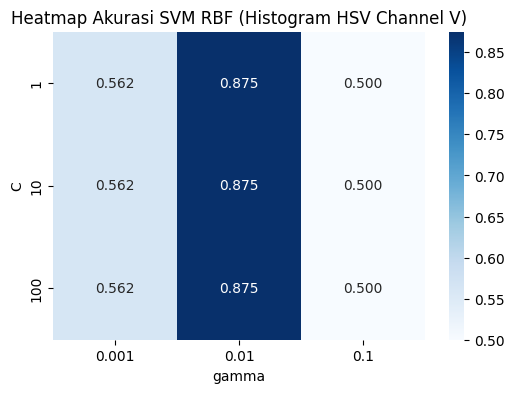

In [ ]:
pivot_table = results_df.pivot(index="C", columns="gamma", values="Accuracy")

plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".3f")
plt.title("Heatmap Akurasi SVM RBF (Histogram HSV Channel V)")
plt.show()

Pada proses klasifikasi citra siang dan malam menggunakan fitur histogram dari kanal V pada ruang warna HSV serta model SVM dengan kernel RBF, didapatkan hasil bahwa kombinasi parameter C = 1, 10, dan 100 dengan gamma = 0.01 menghasilkan akurasi tertinggi sebesar 0.8333. Sebaliknya, ketika nilai gamma diubah ke 0.1 atau 0.001, akurasi menurun cukup signifikan hingga berkisar antara 0.50–0.60. Hasil ini memperlihatkan bahwa parameter gamma memiliki pengaruh yang lebih dominan dalam menentukan kinerja model dibandingkan nilai C. Oleh karena itu, pemilihan nilai gamma yang tepat menjadi faktor penting agar model mampu mengenali perbedaan pencahayaan pada citra siang dan malam dengan lebih akurat.